In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass (1).csv


In [7]:
glass = pd.read_csv("glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [8]:
glass.shape

(214, 10)

In [9]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# **Visualization**

<Figure size 800x800 with 0 Axes>

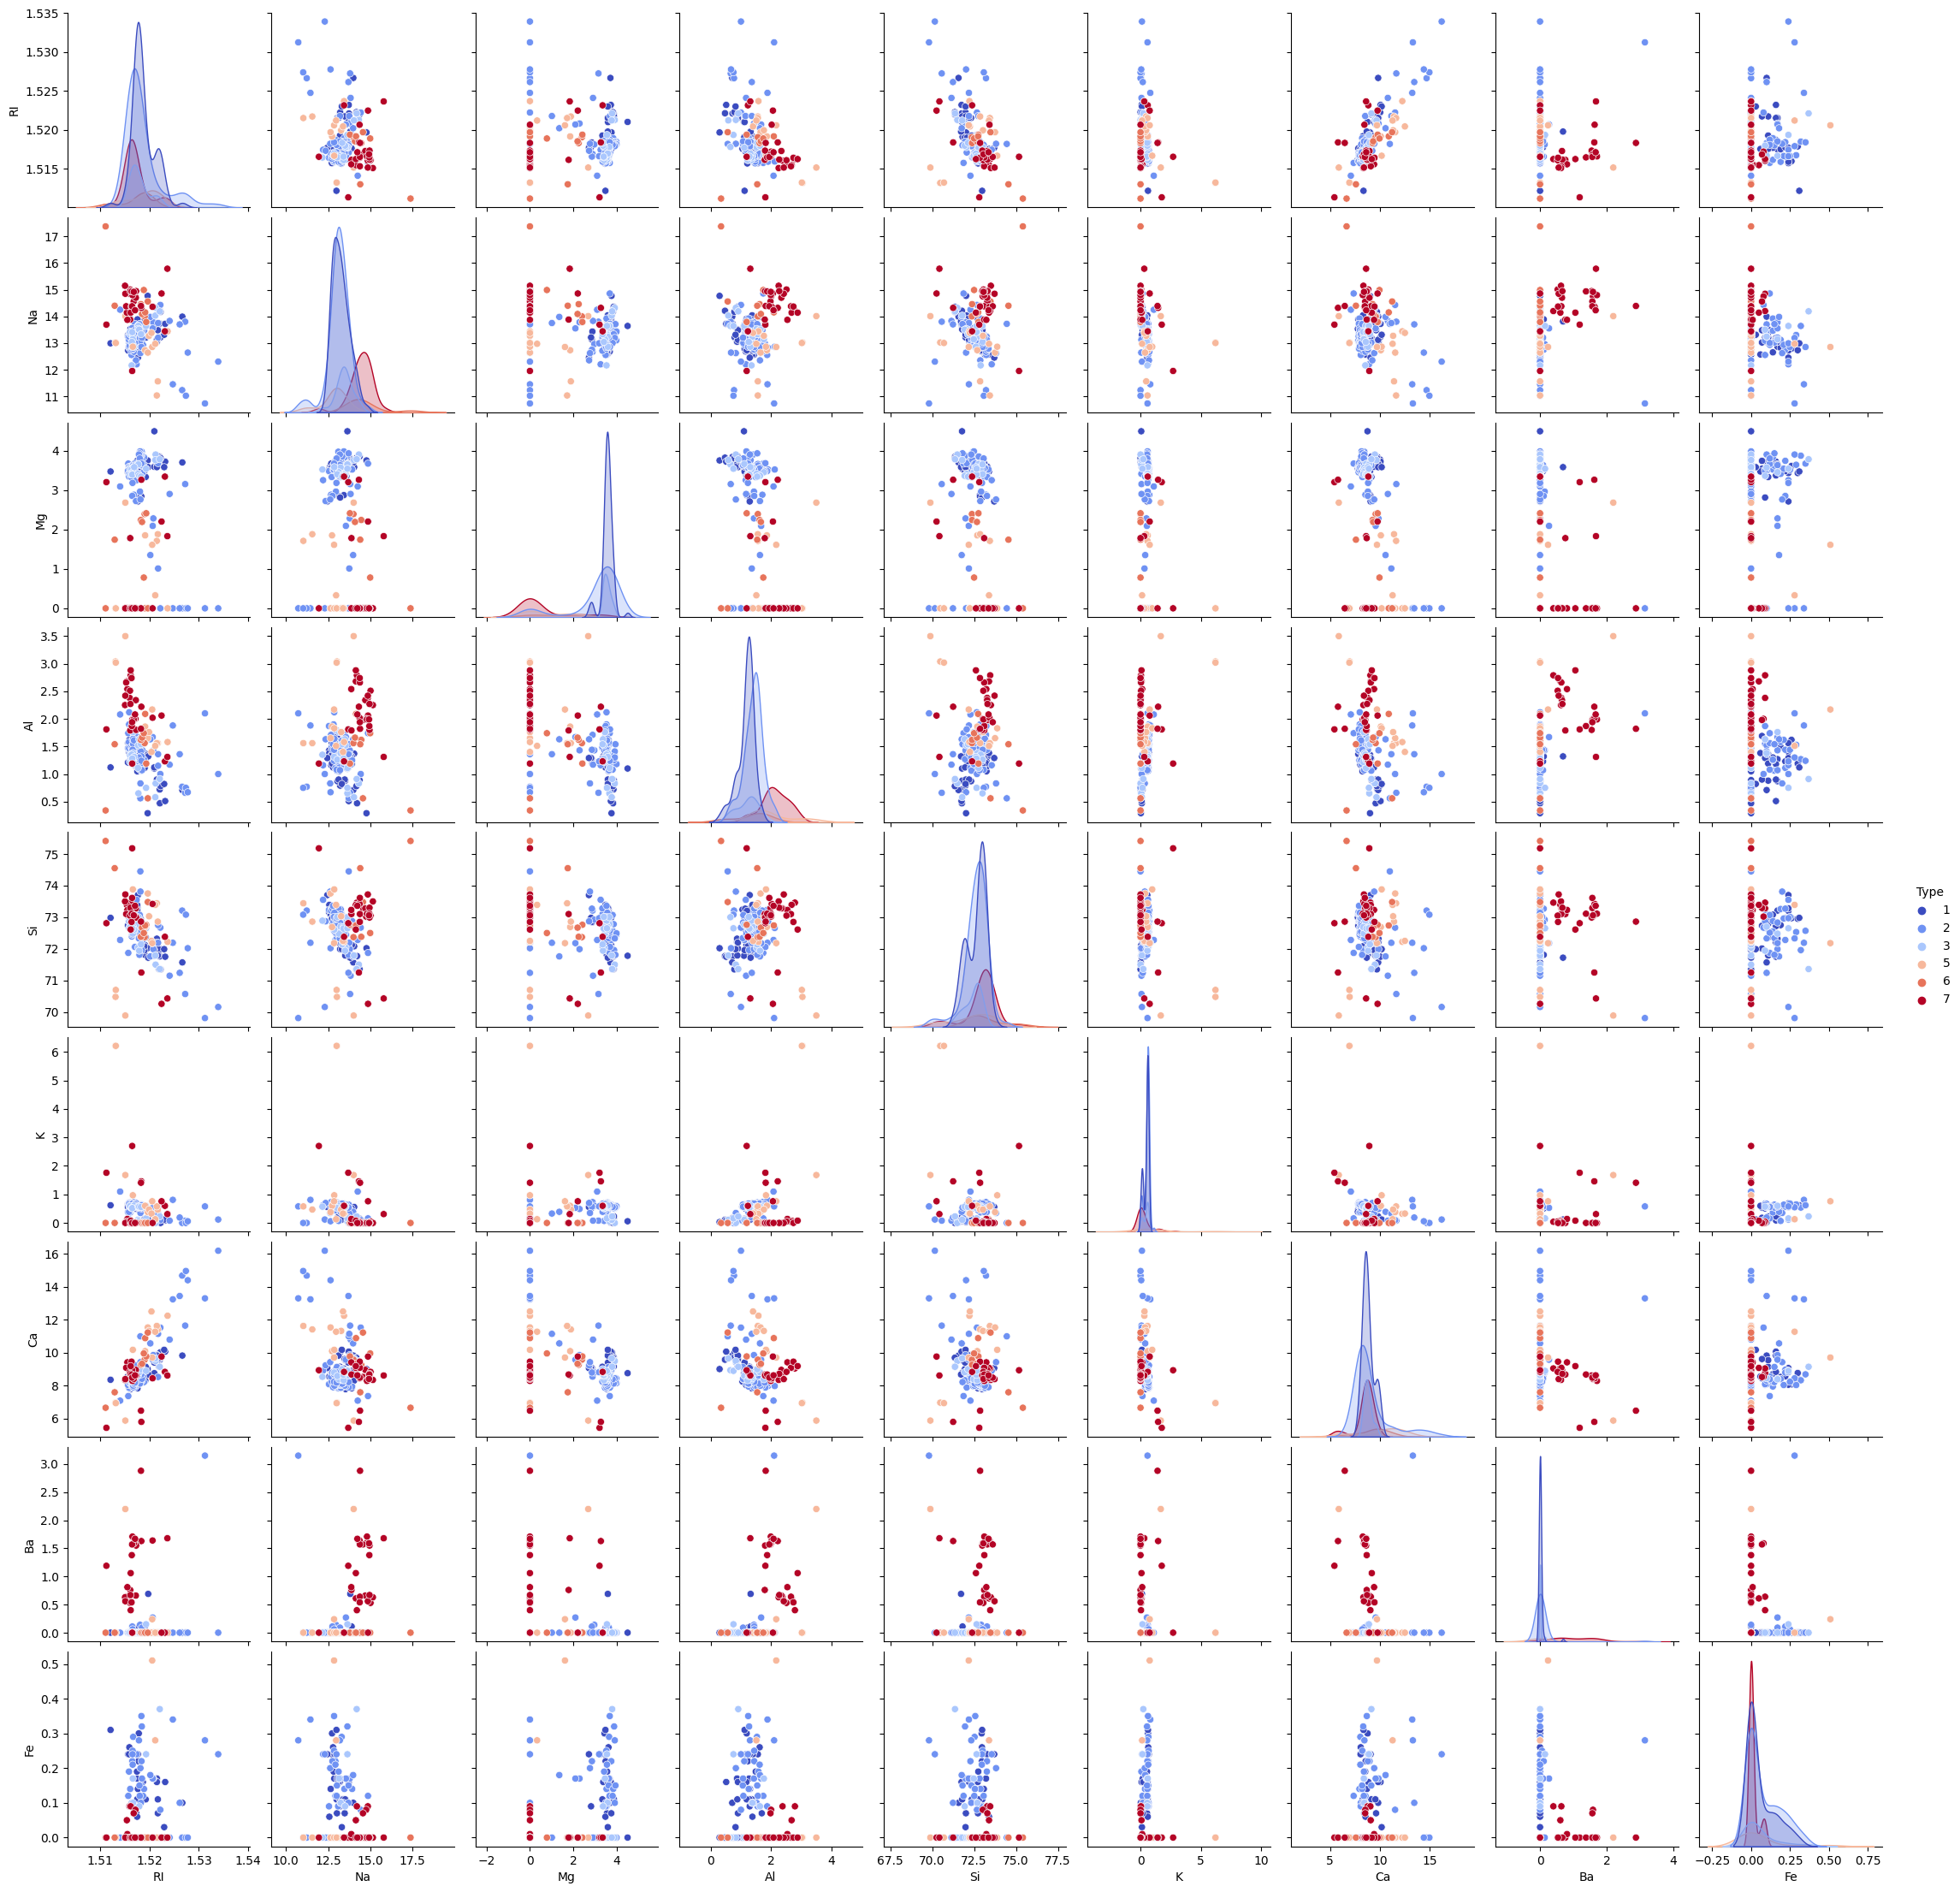

In [12]:
plt.figure(figsize=(8,8))
sns.pairplot(glass, hue='Type',palette='coolwarm')
plt.show()

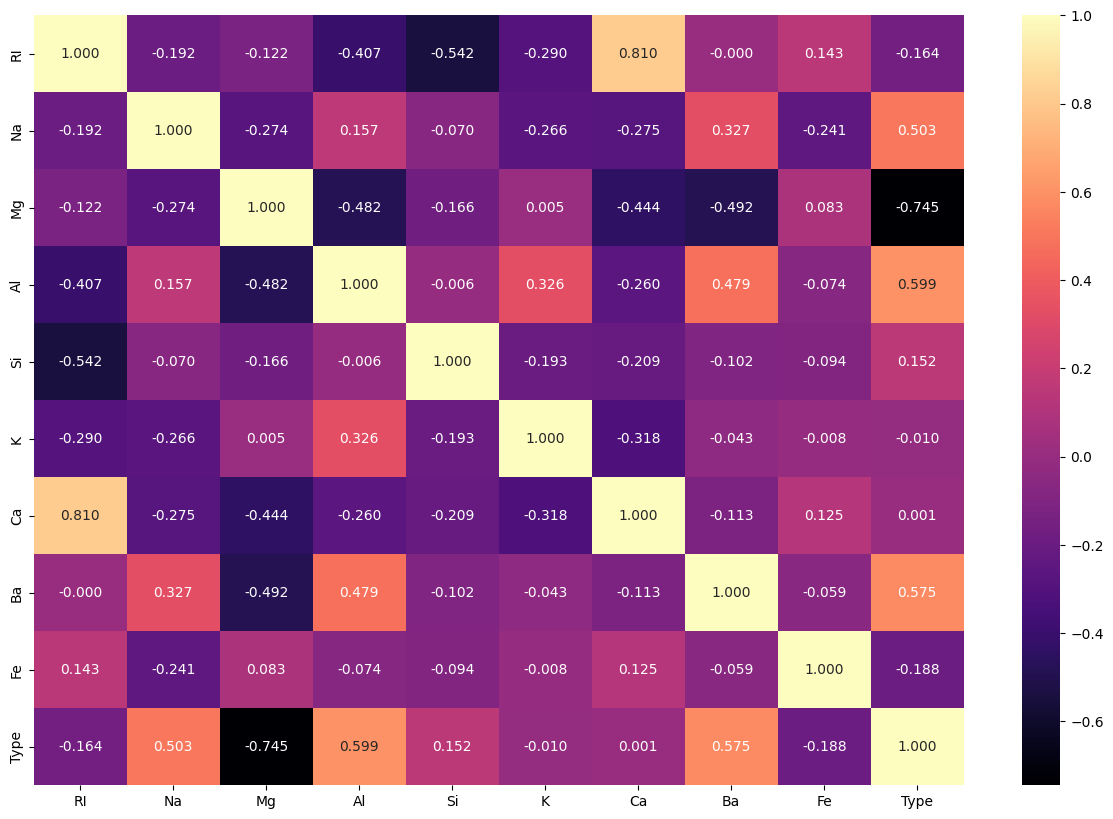

In [13]:
plt.figure(figsize = (15, 10));
sns.heatmap(glass.corr(), cmap='magma', annot=True, fmt='.3f')
plt.show()

<Axes: xlabel='RI', ylabel='Na'>

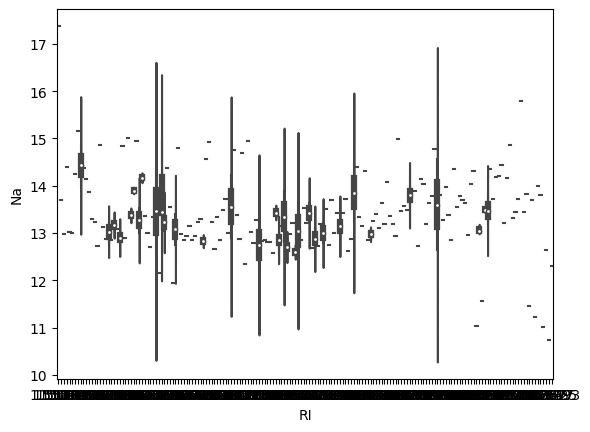

In [14]:
sns.violinplot(x= glass['RI'],y= glass['Na'])

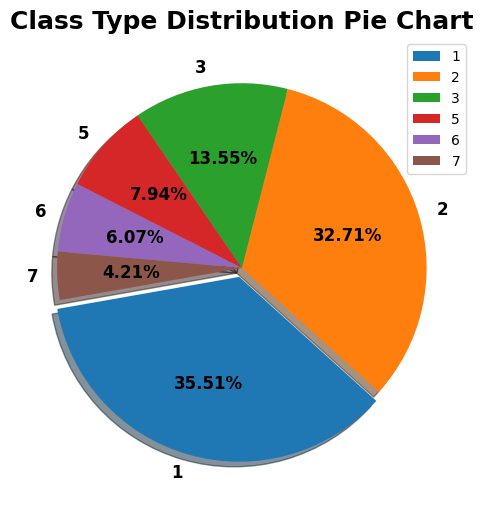

In [15]:
plt.figure(figsize = (10,6))
plt.pie(glass['Type'].value_counts(),
       labels=glass.Type.unique(),
       explode = [0.05,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

# **KNN Model Building**

In [16]:
X = glass.iloc[:, 0:9]
Y = glass.iloc[:, -1]
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [17]:
model = KNeighborsClassifier(n_neighbors = 12)

In [18]:
 model.fit(X,Y)

KNeighborsClassifier(n_neighbors=12)

In [19]:
kfold = KFold(n_splits=8)
results = cross_val_score(model, X, Y, cv = kfold)
results

array([0.51851852, 0.81481481, 0.88888889, 0.37037037, 0.44444444,
       0.22222222, 0.        , 0.        ])

In [20]:
results.mean()

0.4074074074074074

In [21]:
model.predict([[1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0]])

array([7])

In [22]:
n_neighbors = list(range(1,33))
parameters = {'n_neighbors' : n_neighbors}

In [23]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [24]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


# **Visualizing the CV results**

In [25]:
# choose k between 1 to 40
k_range = range(1,45)
k_scores = []

# use iteration to caclulator different k in models
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())

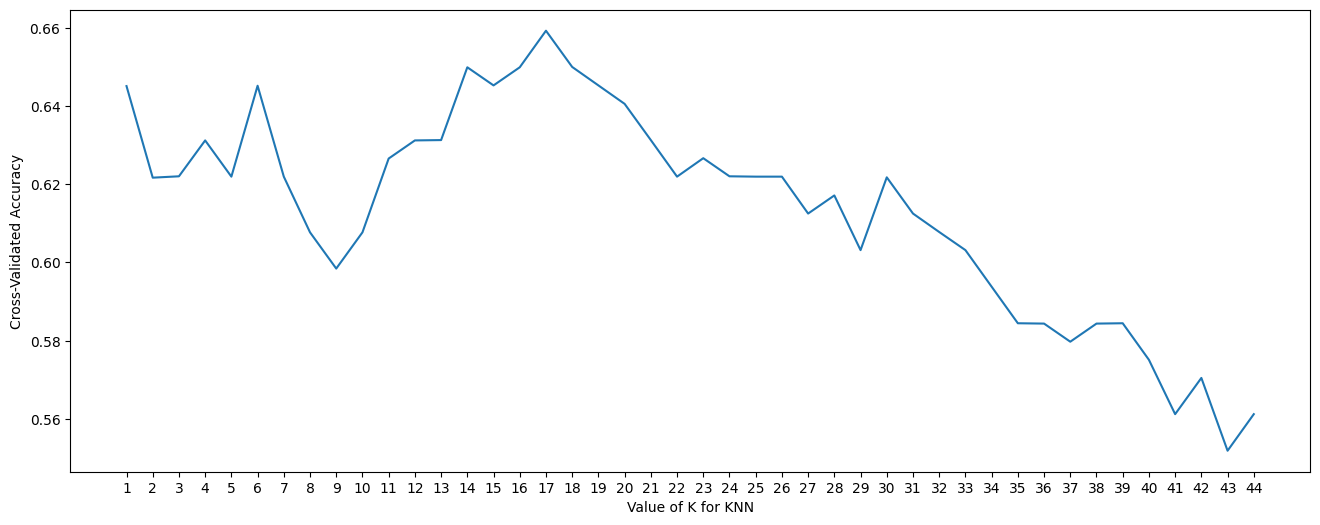

In [26]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

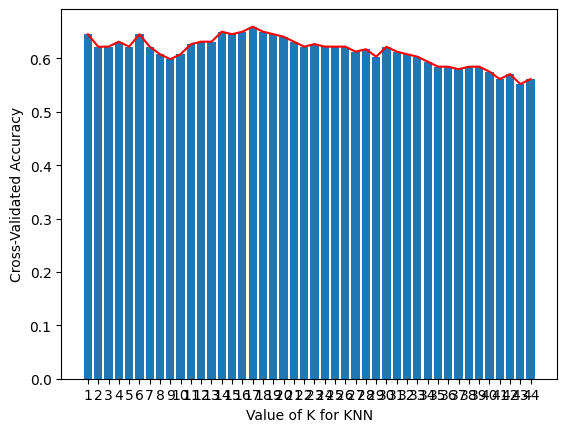

<Figure size 1600x600 with 0 Axes>

In [27]:
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.figure(figsize=(16,6))
plt.show()

In [28]:
k_scores

[0.6450908455625437,
 0.621680642907058,
 0.6220300489168414,
 0.6312019566736548,
 0.6219426974143956,
 0.6451781970649895,
 0.6219426974143956,
 0.6077044025157233,
 0.598445143256464,
 0.6077044025157233,
 0.6265723270440252,
 0.6312019566736548,
 0.6312893081761006,
 0.649895178197065,
 0.6452655485674353,
 0.649895178197065,
 0.6592417889587701,
 0.6499825296995109,
 0.6452655485674353,
 0.6405485674353598,
 0.6312893081761005,
 0.6219426974143956,
 0.626659678546471,
 0.6220300489168414,
 0.6219426974143955,
 0.6219426974143955,
 0.6125087351502445,
 0.6171383647798742,
 0.6031621243885396,
 0.6217679944095038,
 0.6125087351502446,
 0.6077917540181691,
 0.6031621243885394,
 0.5938155136268344,
 0.5844689028651292,
 0.5843815513626834,
 0.5797519217330538,
 0.5843815513626834,
 0.5844689028651292,
 0.5751222921034241,
 0.5612334032145353,
 0.5704926624737945,
 0.5518867924528302,
 0.5612334032145353]

In [29]:
glass_accuracy = pd.DataFrame({'Value of k' : range(1,45),
                            'Accuracy' : k_scores})
glass_accuracy

,Value of k,Accuracy
0,1,0.645091
1,2,0.621681
2,3,0.622030
3,4,0.631202
4,5,0.621943
5,6,0.645178
6,7,0.621943
7,8,0.607704
8,9,0.598445
9,10,0.607704


In [30]:
glass_accuracy.sort_values('Accuracy', ascending = False)

,Value of k,Accuracy
16,17,0.659242
17,18,0.649983
13,14,0.649895
15,16,0.649895
18,19,0.645266
14,15,0.645266
5,6,0.645178
0,1,0.645091
19,20,0.640549
12,13,0.631289
